In [1]:
# Load libraries for data input, 
# statistical analysis and visualisation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import geopandas

%matplotlib notebook

In [2]:
# Load a .csv dataset constructed by the NISRA Flexible Table Builder utility

dataset = pd.read_csv('../datasets/ni-census21-people-lgd14+irish_skills_intermediate+sexual_orientation_dvo_agg4-3f82bebb.csv')

In [3]:
# Take a look at a random sample of rows from the dataset,
# to get an idea of the format of the data columns.

dataset.sample(n=5)

,Local Government District 2014 Code,Local Government District 2014 Label,Irish (Ability) Code,Irish (Ability) Label,Sexual Orientation Code,Sexual Orientation Label,Count
78,N09000005,Derry City and Strabane,3,Speaks and reads but does not write Irish,1,Straight or heterosexual,707
128,N09000008,Mid and East Antrim,1,"Understands but does not read, write or speak ...",3,Prefer not to say/Not stated,264
83,N09000005,Derry City and Strabane,4,"Speaks, reads, writes and understands Irish",3,Prefer not to say/Not stated,385
119,N09000007,Lisburn and Castlereagh,4,"Speaks, reads, writes and understands Irish",3,Prefer not to say/Not stated,141
31,N09000002,"Armagh City, Banbridge and Craigavon",5,Other combination of skills,2,"Gay, lesbian, bisexual, other sexual orientation",43


In [4]:
# The information in some columns is repeated - 
# each 'Code' column has a matching 'Label' column.
# So when we're actually visualising things, we only
# need one or the other. I prefer to work with the 
# 'Label' columns, as I can then easily attach the 
# labels to graphs.

useful_cols = ['Local Government District 2014 Label', 
               'Irish (Ability) Label', 
               'Sexual Orientation Label', 
               'Count']

In [5]:
# Some of the rows in the data isn't useful for our investigation - 
# we want to discard the responses of 'Prefer not to say/Not stated'
# to the Sexual Orientation question (Code 3):

dataset = dataset.where(dataset['Sexual Orientation Code']!=3).dropna()
dataset.sample(n=10)

,Local Government District 2014 Code,Local Government District 2014 Label,Irish (Ability) Code,Irish (Ability) Label,Sexual Orientation Code,Sexual Orientation Label,Count
54,N09000004,Causeway Coast and Glens,1.0,"Understands but does not read, write or speak ...",1.0,Straight or heterosexual,4518.0
30,N09000002,"Armagh City, Banbridge and Craigavon",5.0,Other combination of skills,1.0,Straight or heterosexual,1528.0
124,N09000007,Lisburn and Castlereagh,6.0,No ability in Irish,2.0,"Gay, lesbian, bisexual, other sexual orientation",2116.0
87,N09000005,Derry City and Strabane,6.0,No ability in Irish,1.0,Straight or heterosexual,89734.0
123,N09000007,Lisburn and Castlereagh,6.0,No ability in Irish,1.0,Straight or heterosexual,100943.0
115,N09000007,Lisburn and Castlereagh,3.0,Speaks and reads but does not write Irish,2.0,"Gay, lesbian, bisexual, other sexual orientation",14.0
181,N09000011,Ards and North Down,1.0,"Understands but does not read, write or speak ...",2.0,"Gay, lesbian, bisexual, other sexual orientation",76.0
94,N09000006,Fermanagh and Omagh,2.0,Speaks but does not read or write Irish,2.0,"Gay, lesbian, bisexual, other sexual orientation",41.0
82,N09000005,Derry City and Strabane,4.0,"Speaks, reads, writes and understands Irish",2.0,"Gay, lesbian, bisexual, other sexual orientation",212.0
144,N09000009,Mid Ulster,1.0,"Understands but does not read, write or speak ...",1.0,Straight or heterosexual,9312.0


In [6]:
# Now we split the dataset into Irish speakers and non-Irish speakers,
# using the fact that 'No ability in Irish' has a code of 6

dataset_irish = dataset[dataset['Irish (Ability) Code']!=6]
dataset_no_irish = dataset[dataset['Irish (Ability) Code']==6]

In [7]:
# Investigating dataset_irish, we see that it's counting each
# response to Irish (Ability) differently - we want to aggregate
# this into just 'Some Irish'

dataset_irish

,Local Government District 2014 Code,Local Government District 2014 Label,Irish (Ability) Code,Irish (Ability) Label,Sexual Orientation Code,Sexual Orientation Label,Count
0,N09000001,Antrim and Newtownabbey,1.0,"Understands but does not read, write or speak ...",1.0,Straight or heterosexual,3716.0
1,N09000001,Antrim and Newtownabbey,1.0,"Understands but does not read, write or speak ...",2.0,"Gay, lesbian, bisexual, other sexual orientation",94.0
3,N09000001,Antrim and Newtownabbey,2.0,Speaks but does not read or write Irish,1.0,Straight or heterosexual,1328.0
4,N09000001,Antrim and Newtownabbey,2.0,Speaks but does not read or write Irish,2.0,"Gay, lesbian, bisexual, other sexual orientation",33.0
6,N09000001,Antrim and Newtownabbey,3.0,Speaks and reads but does not write Irish,1.0,Straight or heterosexual,401.0
...,...,...,...,...,...,...,...
187,N09000011,Ards and North Down,3.0,Speaks and reads but does not write Irish,2.0,"Gay, lesbian, bisexual, other sexual orientation",15.0
189,N09000011,Ards and North Down,4.0,"Speaks, reads, writes and understands Irish",1.0,Straight or heterosexual,955.0
190,N09000011,Ards and North Down,4.0,"Speaks, reads, writes and understands Irish",2.0,"Gay, lesbian, bisexual, other sexual orientation",52.0
192,N09000011,Ards and North Down,5.0,Other combination of skills,1.0,Straight or heterosexual,501.0


In [8]:
# I achieve this by grouping it by the remaining useful columns (other than Count),
# LGD name and Orientation label, and then summing over each of those
# groups. Note: this has the effect of making the Irish (Ability) columns
# useless, which is fine as we now know this dataset only contains 'Some Irish',
# and also the Sexual Orientation Code column, which is fine as we retain the 
# same information in the Sexual Orientation Label column.

dataset_some_irish = dataset_irish.groupby(['Local Government District 2014 Label', 
                                            'Sexual Orientation Label'], as_index=False).sum()

# To make things match up, we'll do the same for dataset_no_irish

dataset_no_irish = dataset_no_irish.groupby(['Local Government District 2014 Label', 
                                             'Sexual Orientation Label'], as_index=False).sum()

# View what's in dataset_some_irish:

useful_cols_after_lang_sep = ['Local Government District 2014 Label', 
                              'Sexual Orientation Label', 
                              'Count']

dataset_some_irish[useful_cols_after_lang_sep]

,Local Government District 2014 Label,Sexual Orientation Label,Count
0,Antrim and Newtownabbey,"Gay, lesbian, bisexual, other sexual orientation",262.0
1,Antrim and Newtownabbey,Straight or heterosexual,8393.0
2,Ards and North Down,"Gay, lesbian, bisexual, other sexual orientation",191.0
3,Ards and North Down,Straight or heterosexual,4068.0
4,"Armagh City, Banbridge and Craigavon","Gay, lesbian, bisexual, other sexual orientation",451.0
5,"Armagh City, Banbridge and Craigavon",Straight or heterosexual,19093.0
6,Belfast,"Gay, lesbian, bisexual, other sexual orientation",2402.0
7,Belfast,Straight or heterosexual,38801.0
8,Causeway Coast and Glens,"Gay, lesbian, bisexual, other sexual orientation",221.0
9,Causeway Coast and Glens,Straight or heterosexual,10058.0


In [9]:
# Reformat this dataset
# First, split into LGBQ+ and Straight datasets

LGD_dataset_some_irish_straight = dataset_some_irish[dataset_some_irish['Sexual Orientation Label']=='Straight or heterosexual'].set_index('Local Government District 2014 Label')
LGD_dataset_some_irish_lgbq = dataset_some_irish[dataset_some_irish['Sexual Orientation Label']=='Gay, lesbian, bisexual, other sexual orientation'].set_index('Local Government District 2014 Label')

# Then merge those into one, keeping only the population counts for each

LGD_dataset_some_irish = LGD_dataset_some_irish_lgbq[['Count']].join(LGD_dataset_some_irish_straight[['Count']], lsuffix='_LGBQ+', rsuffix='_Straight')

# Repeat with the No Irish one for consistency

LGD_dataset_no_irish_straight = dataset_no_irish[dataset_no_irish['Sexual Orientation Label']=='Straight or heterosexual'].set_index('Local Government District 2014 Label')
LGD_dataset_no_irish_lgbq = dataset_no_irish[dataset_no_irish['Sexual Orientation Label']=='Gay, lesbian, bisexual, other sexual orientation'].set_index('Local Government District 2014 Label')
LGD_dataset_no_irish = LGD_dataset_no_irish_lgbq[['Count']].join(LGD_dataset_no_irish_straight[['Count']], lsuffix='_LGBQ+', rsuffix='_Straight')

# visualise the new dataset

LGD_dataset_some_irish

,Count_LGBQ+,Count_Straight
Local Government District 2014 Label,,
Antrim and Newtownabbey,262.0,8393.0
Ards and North Down,191.0,4068.0
"Armagh City, Banbridge and Craigavon",451.0,19093.0
Belfast,2402.0,38801.0
Causeway Coast and Glens,221.0,10058.0
Derry City and Strabane,575.0,17550.0
Fermanagh and Omagh,232.0,15006.0
Lisburn and Castlereagh,321.0,7705.0
Mid Ulster,327.0,21799.0


In [10]:
# To visualise the data as a map, we use geopandas.
# First, we read in a file containing the geospatial data 
# for the LGDs

ni_map = geopandas.read_file('../datasets/LGD_bounds/OSNI_Open_Data_-_Largescale_Boundaries_-_Local_Government_Districts_(2012).shp',
                             engine='pyogrio')

# Then we merge in our dataset

ni_map_some_irish = ni_map.set_index('LGDNAME').join(LGD_dataset_some_irish)
ni_map_no_irish = ni_map.set_index('LGDNAME').join(LGD_dataset_no_irish)

# Looking at this, we see we have extra columns now, including 'geometry'

ni_map_some_irish

,AREA,LGDCode,OBJECTID,geometry,Count_LGBQ+,Count_Straight
LGDNAME,,,,,,
Antrim and Newtownabbey,9.036142e+05,N09000001,1,"POLYGON Z ((319471.463 397521.103 0.000, 31948...",262.0,8393.0
"Armagh City, Banbridge and Craigavon",1.037929e+08,N09000002,2,"POLYGON Z ((311885.434 366349.968 0.000, 31190...",451.0,19093.0
Belfast,9.777570e+05,N09000003,3,"POLYGON Z ((334071.541 379980.088 0.000, 33409...",2402.0,38801.0
Causeway Coast and Glens,1.187525e+08,N09000004,4,"MULTIPOLYGON Z (((297026.984 446000.593 0.000,...",221.0,10058.0
Derry City and Strabane,4.837549e+07,N09000005,5,"POLYGON Z ((247533.964 424601.021 0.000, 24753...",575.0,17550.0
Fermanagh and Omagh,3.813956e+07,N09000006,6,"POLYGON Z ((266555.385 392092.510 0.000, 26655...",232.0,15006.0
Lisburn and Castlereagh,3.437952e+07,N09000007,7,"POLYGON Z ((343348.406 376381.900 0.000, 34335...",321.0,7705.0
Mid and East Antrim,2.608725e+06,N09000008,8,"POLYGON Z ((329896.206 424716.479 0.000, 32990...",139.0,4664.0
Mid Ulster,1.370286e+08,N09000009,9,"POLYGON Z ((294150.193 412224.918 0.000, 29415...",327.0,21799.0


In [11]:
# Let's make a new column for a some simple analysis - ratio of
# LGBQ+ to Straight populations in each LGD.
# We'll do it for both the 'Some Irish' and 'No Irish' cases

ni_map_some_irish['LGBQ+_to_Straight_ratio'] = ni_map_some_irish['Count_LGBQ+']/ni_map_some_irish['Count_Straight']
ni_map_no_irish['LGBQ+_to_Straight_ratio'] = ni_map_no_irish['Count_LGBQ+']/ni_map_no_irish['Count_Straight']

# Visualise one of them:

ni_map_some_irish

,AREA,LGDCode,OBJECTID,geometry,Count_LGBQ+,Count_Straight,LGBQ+_to_Straight_ratio
LGDNAME,,,,,,,
Antrim and Newtownabbey,9.036142e+05,N09000001,1,"POLYGON Z ((319471.463 397521.103 0.000, 31948...",262.0,8393.0,0.031216
"Armagh City, Banbridge and Craigavon",1.037929e+08,N09000002,2,"POLYGON Z ((311885.434 366349.968 0.000, 31190...",451.0,19093.0,0.023621
Belfast,9.777570e+05,N09000003,3,"POLYGON Z ((334071.541 379980.088 0.000, 33409...",2402.0,38801.0,0.061906
Causeway Coast and Glens,1.187525e+08,N09000004,4,"MULTIPOLYGON Z (((297026.984 446000.593 0.000,...",221.0,10058.0,0.021973
Derry City and Strabane,4.837549e+07,N09000005,5,"POLYGON Z ((247533.964 424601.021 0.000, 24753...",575.0,17550.0,0.032764
Fermanagh and Omagh,3.813956e+07,N09000006,6,"POLYGON Z ((266555.385 392092.510 0.000, 26655...",232.0,15006.0,0.015460
Lisburn and Castlereagh,3.437952e+07,N09000007,7,"POLYGON Z ((343348.406 376381.900 0.000, 34335...",321.0,7705.0,0.041661
Mid and East Antrim,2.608725e+06,N09000008,8,"POLYGON Z ((329896.206 424716.479 0.000, 32990...",139.0,4664.0,0.029803
Mid Ulster,1.370286e+08,N09000009,9,"POLYGON Z ((294150.193 412224.918 0.000, 29415...",327.0,21799.0,0.015001


<IPython.core.display.Javascript object>


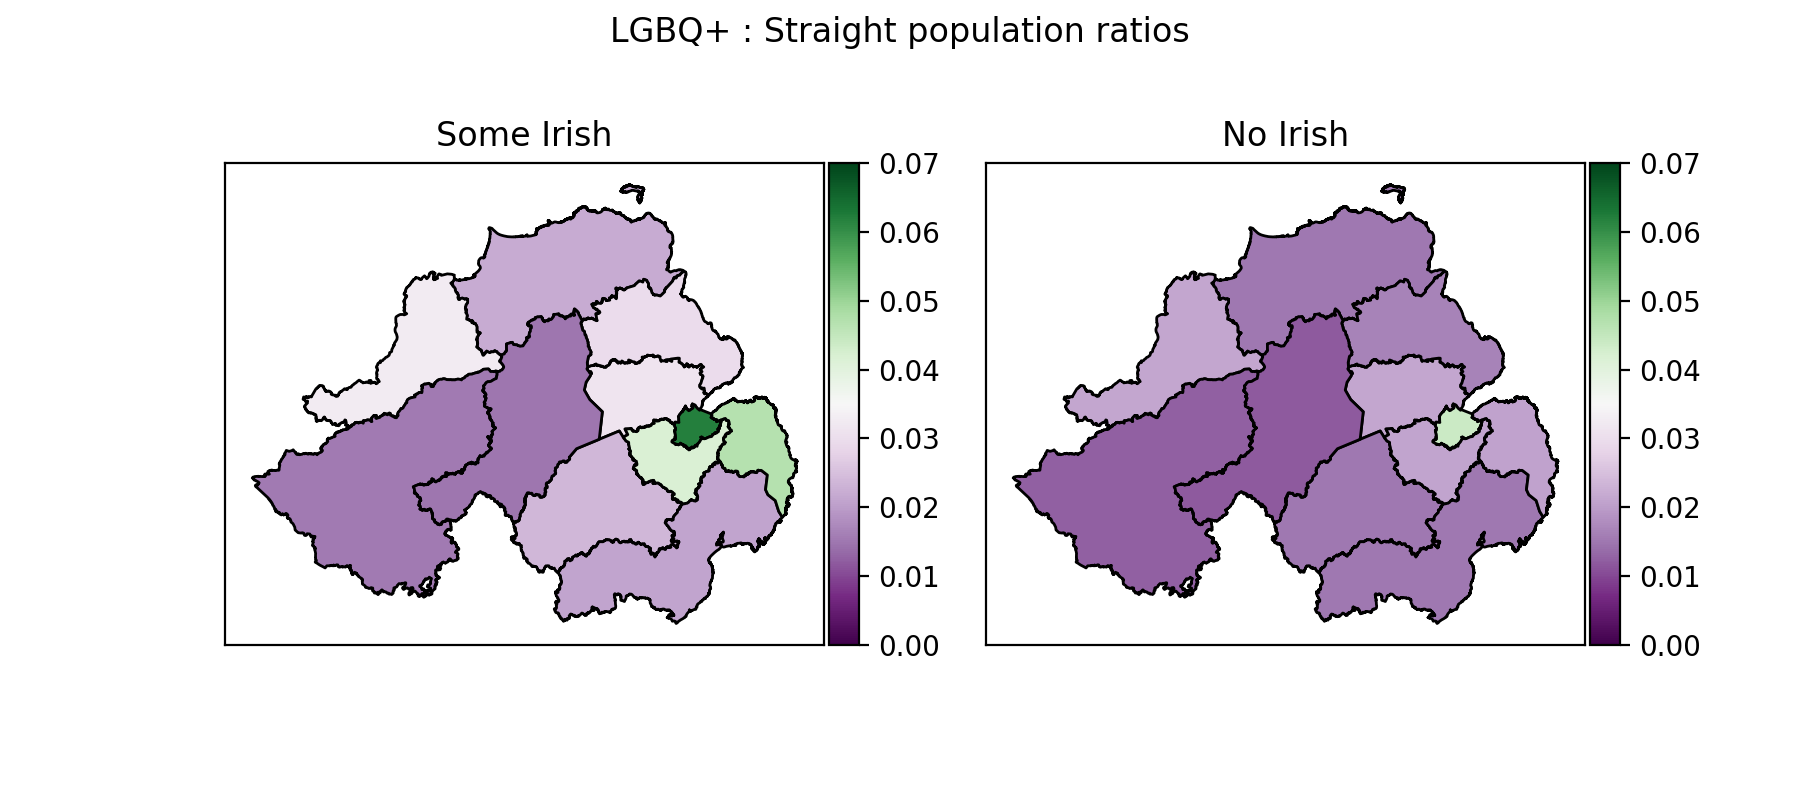

Text(0.5, 0.98, 'LGBQ+ : Straight population ratios')

In [12]:
# Make a choropleth map of the LGBQ+ : Straight ratio

from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9,4))

divider1 = make_axes_locatable(ax1)
cax1 = divider1.append_axes('right', size='5%', pad=0.025)

ni_map_some_irish.plot(column='LGBQ+_to_Straight_ratio', 
                       cmap='PRGn', 
                       legend=True, 
                       ax=ax1,
                       cax=cax1,
                       edgecolor='k',
                       vmin=0,
                       vmax=0.07)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('Some Irish')

divider2 = make_axes_locatable(ax2)
cax2 = divider2.append_axes('right', size='5%', pad=0.025)

ni_map_no_irish.plot(column='LGBQ+_to_Straight_ratio', 
                     cmap='PRGn', 
                     legend=True, 
                     ax=ax2,
                     cax=cax2,
                     edgecolor='k',
                     vmin=0,
                     vmax=0.07)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('No Irish')

fig.suptitle('LGBQ+ : Straight population ratios')

